# Week 4 Predicting Fuel Efficiency (Regression)

## 1) Load the Data

***Instructions)***

Load the data as a Pandas data frame and ensure that it imported correctly.

***Answer)***

In [1]:
# Load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the dataset as a csv
file_location = 'C:/Users/ivan2/gitLocal/DSC550-WINTER2023/auto-mpg.csv'
df = pd.read_csv(file_location)

df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## 2) Prep the data for modeling

***Instructions)***

Begin by prepping the data for modeling:

- Remove the car name column.
- The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.
- Create dummy variables for the origin column.

***Answer)***

Remove car name column

In [3]:
# Remove the car name column
dfV2 = df.drop(columns=['car name'])
dfV2.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


Changing horsepower column to int64 data type

In [4]:
dfV2.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [5]:
# Here we can see all of the unique values in the 'horsepower' column and identify that '?' is cuasing the object data type.
unique_strings = dfV2['horsepower'].unique()
unique_strings

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [6]:
# Convert the column to int64
dfV2['horsepower'] = pd.to_numeric(dfV2['horsepower'], errors='coerce') # errors='coerce' converts all non int to NaN

dfV2['horsepower'] = dfV2['horsepower'].astype('Int64')

dfV2.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        Int64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

Create dummy variables for the origin column

In [7]:
unique_values = dfV2['origin'].unique()
unique_values

array([1, 3, 2], dtype=int64)

In [8]:
dfV3 = pd.get_dummies(dfV2, columns=['origin'], prefix='origin', drop_first=False)
dfV3.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


## 3) Create a correlation Coefficinet matrix or viz

***Instructions)***

Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?

***Answer)***

In [9]:
# Create a correlation matrix
corr_matrix = dfV3.corr()
corr_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,-0.568192,0.259022,0.442174
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,0.604351,-0.352861,-0.396479
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,0.651407,-0.373886,-0.433505
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,0.489625,-0.284948,-0.321936
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,0.598398,-0.298843,-0.440817
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,-0.250806,0.204473,0.109144
model year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,-0.139883,-0.024489,0.193101
origin_1,-0.568192,0.604351,0.651407,0.489625,0.598398,-0.250806,-0.139883,1.000000,-0.597198,-0.643317
origin_2,0.259022,-0.352861,-0.373886,-0.284948,-0.298843,0.204473,-0.024489,-0.597198,1.000000,-0.229895
origin_3,0.442174,-0.396479,-0.433505,-0.321936,-0.440817,0.109144,0.193101,-0.643317,-0.229895,1.000000


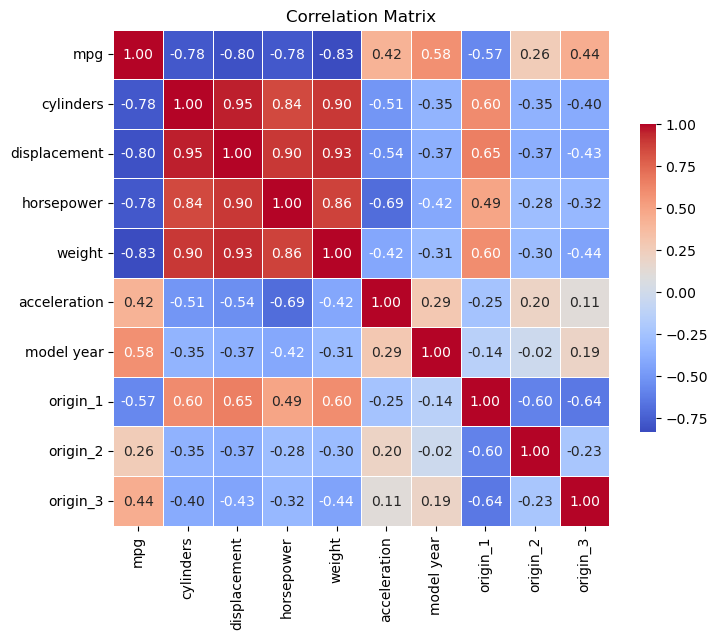

In [10]:
# Using a heatmap to visualize the correlation matrix
import seaborn as sns

# Creating the heatmap visualization
plt.figure(figsize=(8, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix')
plt.show()

Cylinders, Displacement, Horsepower, and Weight are all negatively correlated with MPG. This means that as any of those four features increase, MPG will decrease.

This makes sense as heavier and stronger cars are commonly associated with lower MPG.

## 4) Plot mpg vs. weight

***Instructions)***

Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.

***Answer)***

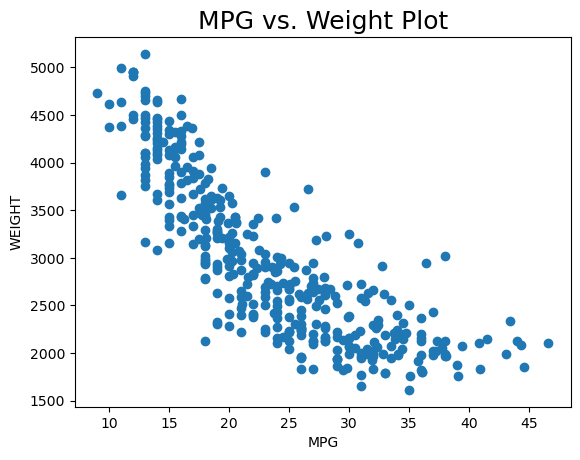

In [11]:
# Create a scatter plot of mpg versus weight.

plt.scatter(dfV3['mpg'],dfV3['weight'])
plt.title('MPG vs. Weight Plot', fontsize=18)
plt.xlabel('MPG')
plt.ylabel('WEIGHT')
plt.show()

The plot graph further confirms the relationship observed between MPG and Weight in the correlation matrix. As the plot shows, as weight increases, the mpg decreases and vice-versa.

This is a negative relationship as shown in the correlation matrix with a correlation coefficineto -0.83

## 5) Randomly split the data to training and test data

***Instructions)***

Randomly split the data into 80% training data and 20% test data, where your target is mpg.

***Answer)***

In [12]:
from sklearn.model_selection import train_test_split

X = dfV3.drop('mpg', axis=1)
Y = dfV3['mpg']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)


## 6) Train an ordinary linear regression

***Instructions)***

Train an ordinary linear regression on the training data.

***Answer)***

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Using an imputater to change NaN values to mean values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [14]:
# Create a linear regression model instance
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_imputed, Y_train)


LinearRegression()

## 7) Calculate R2, RMSE, and MAE

***Instructions)***

Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

***Answer)***

In [15]:
# Predict on both training and test sets
Y_train_pred = model.predict(X_train_imputed)
Y_test_pred = model.predict(X_test_imputed)

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate R2
r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))

# Calculate MAE
mae_train = mean_absolute_error(Y_train, Y_train_pred)
mae_test = mean_absolute_error(Y_test, Y_test_pred)

# Print the results
print(f"Training Set: R2 = {r2_train}, RMSE = {rmse_train}, MAE = {mae_train}")
print(f"Test Set: R2 = {r2_test}, RMSE = {rmse_test}, MAE = {mae_test}")

Training Set: R2 = 0.8188351673935308, RMSE = 3.3702152226442696, MAE = 2.605411193982131
Test Set: R2 = 0.8449024450695692, RMSE = 2.8877402866133135, MAE = 2.287642128971971


## 8) Try another regression model

***Instructions)***

Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

***Answer)***

I decided to use a Random Forest Regression. This model builds multiple decision trees during training and uses the mean prediction fo individual trees for regression.

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model instance
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the imputed training data
rf_model.fit(X_train_imputed, Y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict on both training and test sets
Y_train_pred_rf = rf_model.predict(X_train_imputed)
Y_test_pred_rf = rf_model.predict(X_test_imputed)

In [20]:
# Calculate R2
r2_train_rf = r2_score(Y_train, Y_train_pred_rf)
r2_test_rf = r2_score(Y_test, Y_test_pred_rf)

# Calculate RMSE
rmse_train_rf = np.sqrt(mean_squared_error(Y_train, Y_train_pred_rf))
rmse_test_rf = np.sqrt(mean_squared_error(Y_test, Y_test_pred_rf))

# Calculate MAE
mae_train_rf = mean_absolute_error(Y_train, Y_train_pred_rf)
mae_test_rf = mean_absolute_error(Y_test, Y_test_pred_rf)

# Print the results
print(f"Random Forest - Training Set: R2 = {r2_train_rf}, RMSE = {rmse_train_rf}, MAE = {mae_train_rf}")
print(f"Random Forest - Test Set: R2 = {r2_test_rf}, RMSE = {rmse_test_rf}, MAE = {mae_test_rf}")

Random Forest - Training Set: R2 = 0.9809494015286337, RMSE = 1.0928863434723797, MAE = 0.7469999999999997
Random Forest - Test Set: R2 = 0.9153585002076691, RMSE = 2.1332773934723064, MAE = 1.5889125000000002


The Random Forest Regression model has a better performance than Ordinary Linear Regression. This can be seen by the higher R2 in training and test data. However, the RFR model looks to have some overfitting since the test R2 is 8% lower than the training R2. Fine tunning would need to occur to avoid overfitting, but I would still choose the RFR model over OLR model.